<a href="https://colab.research.google.com/github/meenakshikagda/Data-visualization/blob/master/Figure_paper_annotations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library("jsonlite") #https://cran.r-project.org/web/packages/jsonlite/jsonlite.pdf
library("dplyr")
library("httr") #https://cran.r-project.org/web/packages/httr/vignettes/quickstart.html
library("ggplot2")
library("RColorBrewer")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
install.packages("splitstackshape")
library(splitstackshape)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages("cowplot")
library("cowplot")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
base_url <- "https://www.encodeproject.org/search/?status=released&format=json&limit=all"
datatype <- "Annotation"
field1 <- "annotation_type"

url <- paste(base_url, "&type=", datatype, "&field=", field1, sep="")

url

[1] "https://www.encodeproject.org/search/?status=released&format=json&limit=all&type=Annotation&field=annotation_type"

In [8]:
req <- GET(url)

In [9]:
json <- content(req, as = "text")

No encoding supplied: defaulting to UTF-8.



In [10]:
text <-fromJSON(json)

In [11]:
colnames(text$`@graph`)

[1] "@id"             "@type"           "annotation_type"

In [12]:
my_df <- flatten(text$`@graph`)

In [13]:
colnames(my_df)


[1] "@id"             "@type"           "annotation_type"

In [14]:
head(my_df)

,@id,@type,annotation_type
,<chr>,<list>,<chr>
1,/annotations/ENCSR819HBB/,"Annotation, FileSet , Dataset , Item",imputation
2,/annotations/ENCSR654DVI/,"Annotation, FileSet , Dataset , Item",imputation
3,/annotations/ENCSR946LIM/,"Annotation, FileSet , Dataset , Item",chromatin state
4,/annotations/ENCSR373BUS/,"Annotation, FileSet , Dataset , Item",imputation
5,/annotations/ENCSR181MDB/,"Annotation, FileSet , Dataset , Item",imputation
6,/annotations/ENCSR863IZD/,"Annotation, FileSet , Dataset , Item",imputation


In [15]:
my_df <- my_df[,-2 ] #remove type

In [16]:
head(my_df)

,@id,annotation_type
,<chr>,<chr>
1,/annotations/ENCSR819HBB/,imputation
2,/annotations/ENCSR654DVI/,imputation
3,/annotations/ENCSR946LIM/,chromatin state
4,/annotations/ENCSR373BUS/,imputation
5,/annotations/ENCSR181MDB/,imputation
6,/annotations/ENCSR863IZD/,imputation


In [17]:
nrow(my_df)

[1] 439020

In [18]:
ncol(my_df)

[1] 2

In [19]:
my_df3 <- my_df %>% 
            group_by(annotation_type) %>% 
            summarise(Count = n())

In [20]:
my_df3

annotation_type,Count
<chr>,<int>
binding sites,1
candidate Cis-Regulatory Elements,4157
chromatin state,1251
consensus DNase hypersensitivity sites,2
dsQTLs,9
eQTLs,49
exclusion list,4
fine-mapped variants,119
footprints,373297


In [21]:
#https://drsimonj.svbtle.com/creating-corporate-colour-palettes-for-ggplot2
drsimonj_colors <- c(
  `red`        = "#d11141",
  `green`      = "#00b159",
  `blue`       = "#00aedb",
  `orange`     = "#f37735",
  `yellow`     = "#ffc425",
  `light grey` = "#cccccc",
  `dark grey`  = "#8c8c8c",
  `lightblue`  = "#079BCC",
  `lightpink`  = "#F89BCC",
  `neopink`    = "#F8138C",
  `neoyellow`  = "#F8F78C")

In [22]:
drsimonj_colors

red      green       blue     orange     yellow light grey  dark grey 
 "#d11141"  "#00b159"  "#00aedb"  "#f37735"  "#ffc425"  "#cccccc"  "#8c8c8c" 
 lightblue  lightpink    neopink  neoyellow 
 "#079BCC"  "#F89BCC"  "#F8138C"  "#F8F78C"

In [23]:
drsimonj_cols <- function(...) {
  cols <- c(...)

  if (is.null(cols))
    return (drsimonj_colors)

  drsimonj_colors[cols]
}

In [24]:
drsimonj_palettes <- list(
  `main`  = drsimonj_cols("blue", "green", "yellow"),

  `cool`  = drsimonj_cols("blue", "green"),

  `hot`   = drsimonj_cols("yellow", "orange", "red"),

  `mixed` = drsimonj_cols("blue", "green", "yellow", "orange", "red"),

  `grey`  = drsimonj_cols("light grey", "dark grey"),

  `mk_pallette` = drsimonj_cols("lightblue", "lightpink"),

  `mk_neo` = drsimonj_cols("lightpink", "yellow")
)

In [25]:
drsimonj_pal <- function(palette = "main", reverse = FALSE, ...) {
  pal <- drsimonj_palettes[[palette]]

  if (reverse) pal <- rev(pal)

  colorRampPalette(pal, ...)
}

In [26]:
drsimonj_pal("mk_neo")(10)

[1] "#F89BCC" "#F89FB9" "#F9A4A6" "#FAA894" "#FBAD81" "#FBB16F" "#FCB65C"
 [8] "#FDBA4A" "#FEBF37" "#FFC425"

In [29]:
library(repr)

In [92]:
options(repr.plot.width=15, repr.plot.height=12)

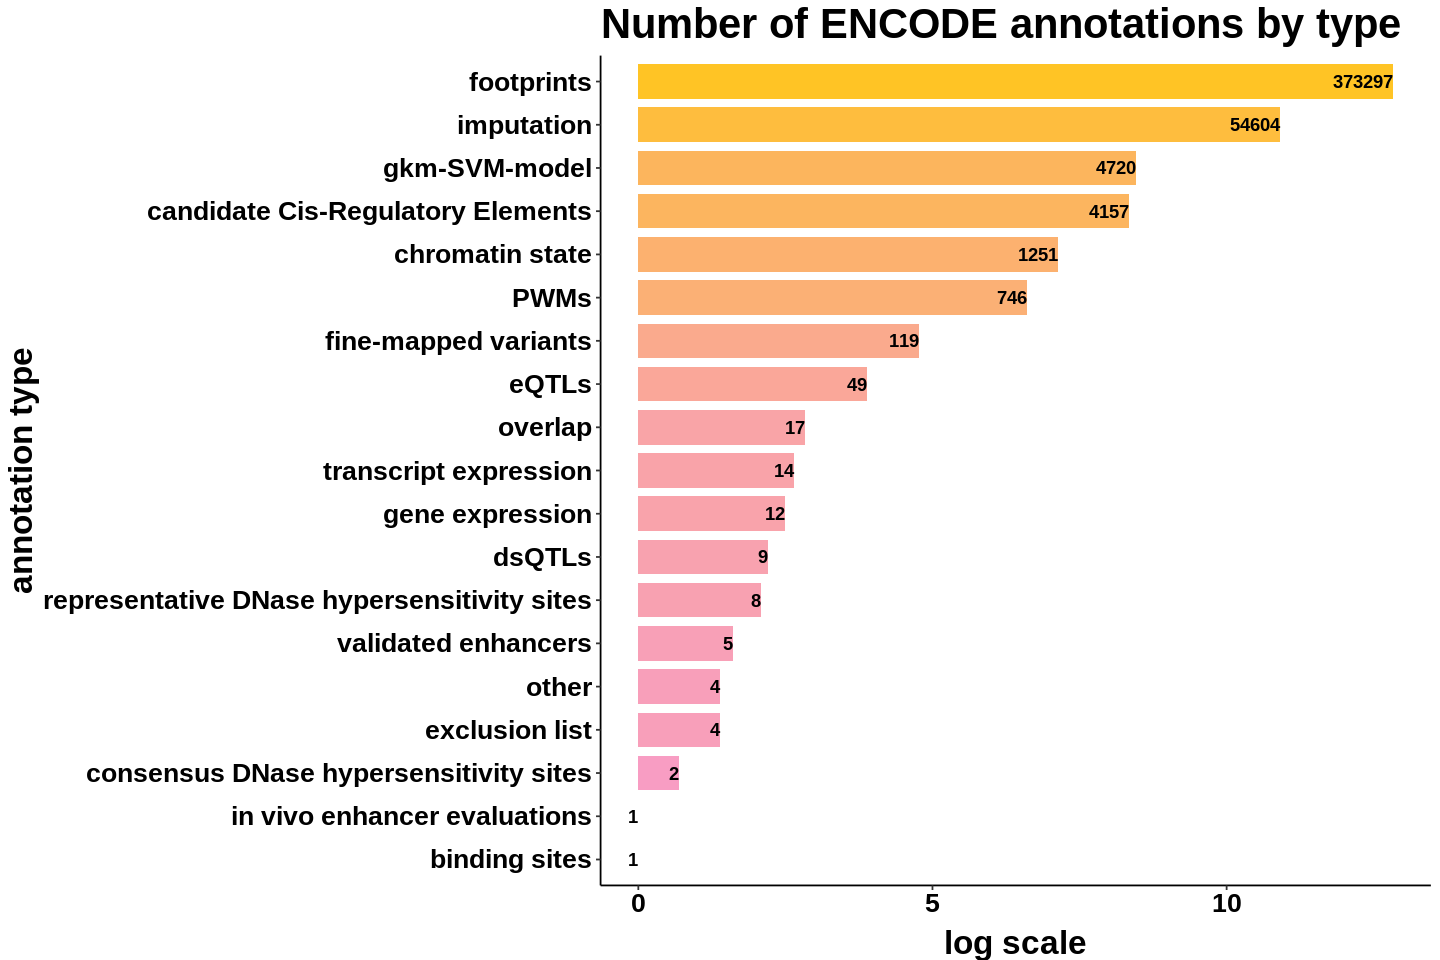

In [32]:
#mk_neo
ggplot(my_df3) +
    geom_col(aes(x=reorder(annotation_type,Count), y=log(Count), fill=log(Count)), 
    width=0.8, position = position_dodge(5)) +
    coord_flip() + theme_classic() +
    scale_fill_gradientn(colors=drsimonj_pal("mk_neo")(9)) +
    geom_text(aes(x=reorder(annotation_type,Count), y=log(Count),label = Count), 
    vjust=0.5, hjust=1, angle=360, color="black", fontface='bold') +
    ggtitle("Number of ENCODE annotations by type") +
    theme(legend.position="none", 
            #plot.margin=unit(c(0.5,0.5,0.5,0.5),"cm"),
           axis.title.x=element_text(vjust = -0.5, size=20, color="black", face="bold"),
           axis.title.y=element_text(hjust = 0.5, size=20, color="black", face="bold"),
           axis.text.x =element_text(size=16, color="black", face = "bold"),
           axis.text.y =element_text(size=16, color="black", face = "bold")) + 
           theme(plot.title = element_text(size = 25, face = "bold"),
           panel.spacing = unit(0.2, 'cm')) +
           xlab("annotation type") +
           ylab("log scale")

In [37]:
base_url <- "https://www.encodeproject.org/search/?status=released&format=json&limit=all"
datatype <- "Annotation"
field1 <- "annotation_type"
field2 <- "award.rfa"
frame <- "embedded"

url <- paste(base_url, "&type=", datatype, 
                "&field=", field1, 
                "&field=", field2, 
                "&frame=", frame, sep="")

url


[1] "https://www.encodeproject.org/search/?status=released&format=json&limit=all&type=Annotation&field=annotation_type&field=award.rfa&frame=embedded"

In [38]:
req <- GET(url)
json <- content(req, as = "text")
text <-fromJSON(json)
colnames(text$`@graph`)

No encoding supplied: defaulting to UTF-8.



[1] "@id"             "@type"           "annotation_type" "award"

In [39]:
my_df <- flatten(text$`@graph`)
head(my_df)

,@id,@type,annotation_type,award.rfa
,<chr>,<list>,<chr>,<chr>
1,/annotations/ENCSR819HBB/,"Annotation, FileSet , Dataset , Item",imputation,ENCODE4
2,/annotations/ENCSR654DVI/,"Annotation, FileSet , Dataset , Item",imputation,ENCODE4
3,/annotations/ENCSR946LIM/,"Annotation, FileSet , Dataset , Item",chromatin state,ENCODE4
4,/annotations/ENCSR373BUS/,"Annotation, FileSet , Dataset , Item",imputation,ENCODE4
5,/annotations/ENCSR181MDB/,"Annotation, FileSet , Dataset , Item",imputation,ENCODE4
6,/annotations/ENCSR863IZD/,"Annotation, FileSet , Dataset , Item",imputation,ENCODE4


In [100]:
colnames(my_df)[4] <- "award"
colnames(my_df)

[1] "@id"             "@type"           "annotation_type" "award"

In [102]:
my_df3 <- my_df %>% 
            group_by(annotation_type, award) %>% 
            summarise(Count = n())

`summarise()` has grouped output by 'annotation_type'. You can override using
the `.groups` argument.


In [103]:
my_df3

annotation_type,award,Count
<chr>,<chr>,<int>
binding sites,ENCODE4,1
candidate Cis-Regulatory Elements,ENCODE,1
candidate Cis-Regulatory Elements,ENCODE3,2464
candidate Cis-Regulatory Elements,ENCODE4,1692
chromatin state,ENCODE,165
chromatin state,ENCODE2,15
chromatin state,ENCODE3,140
chromatin state,ENCODE4,833
chromatin state,Roadmap,98


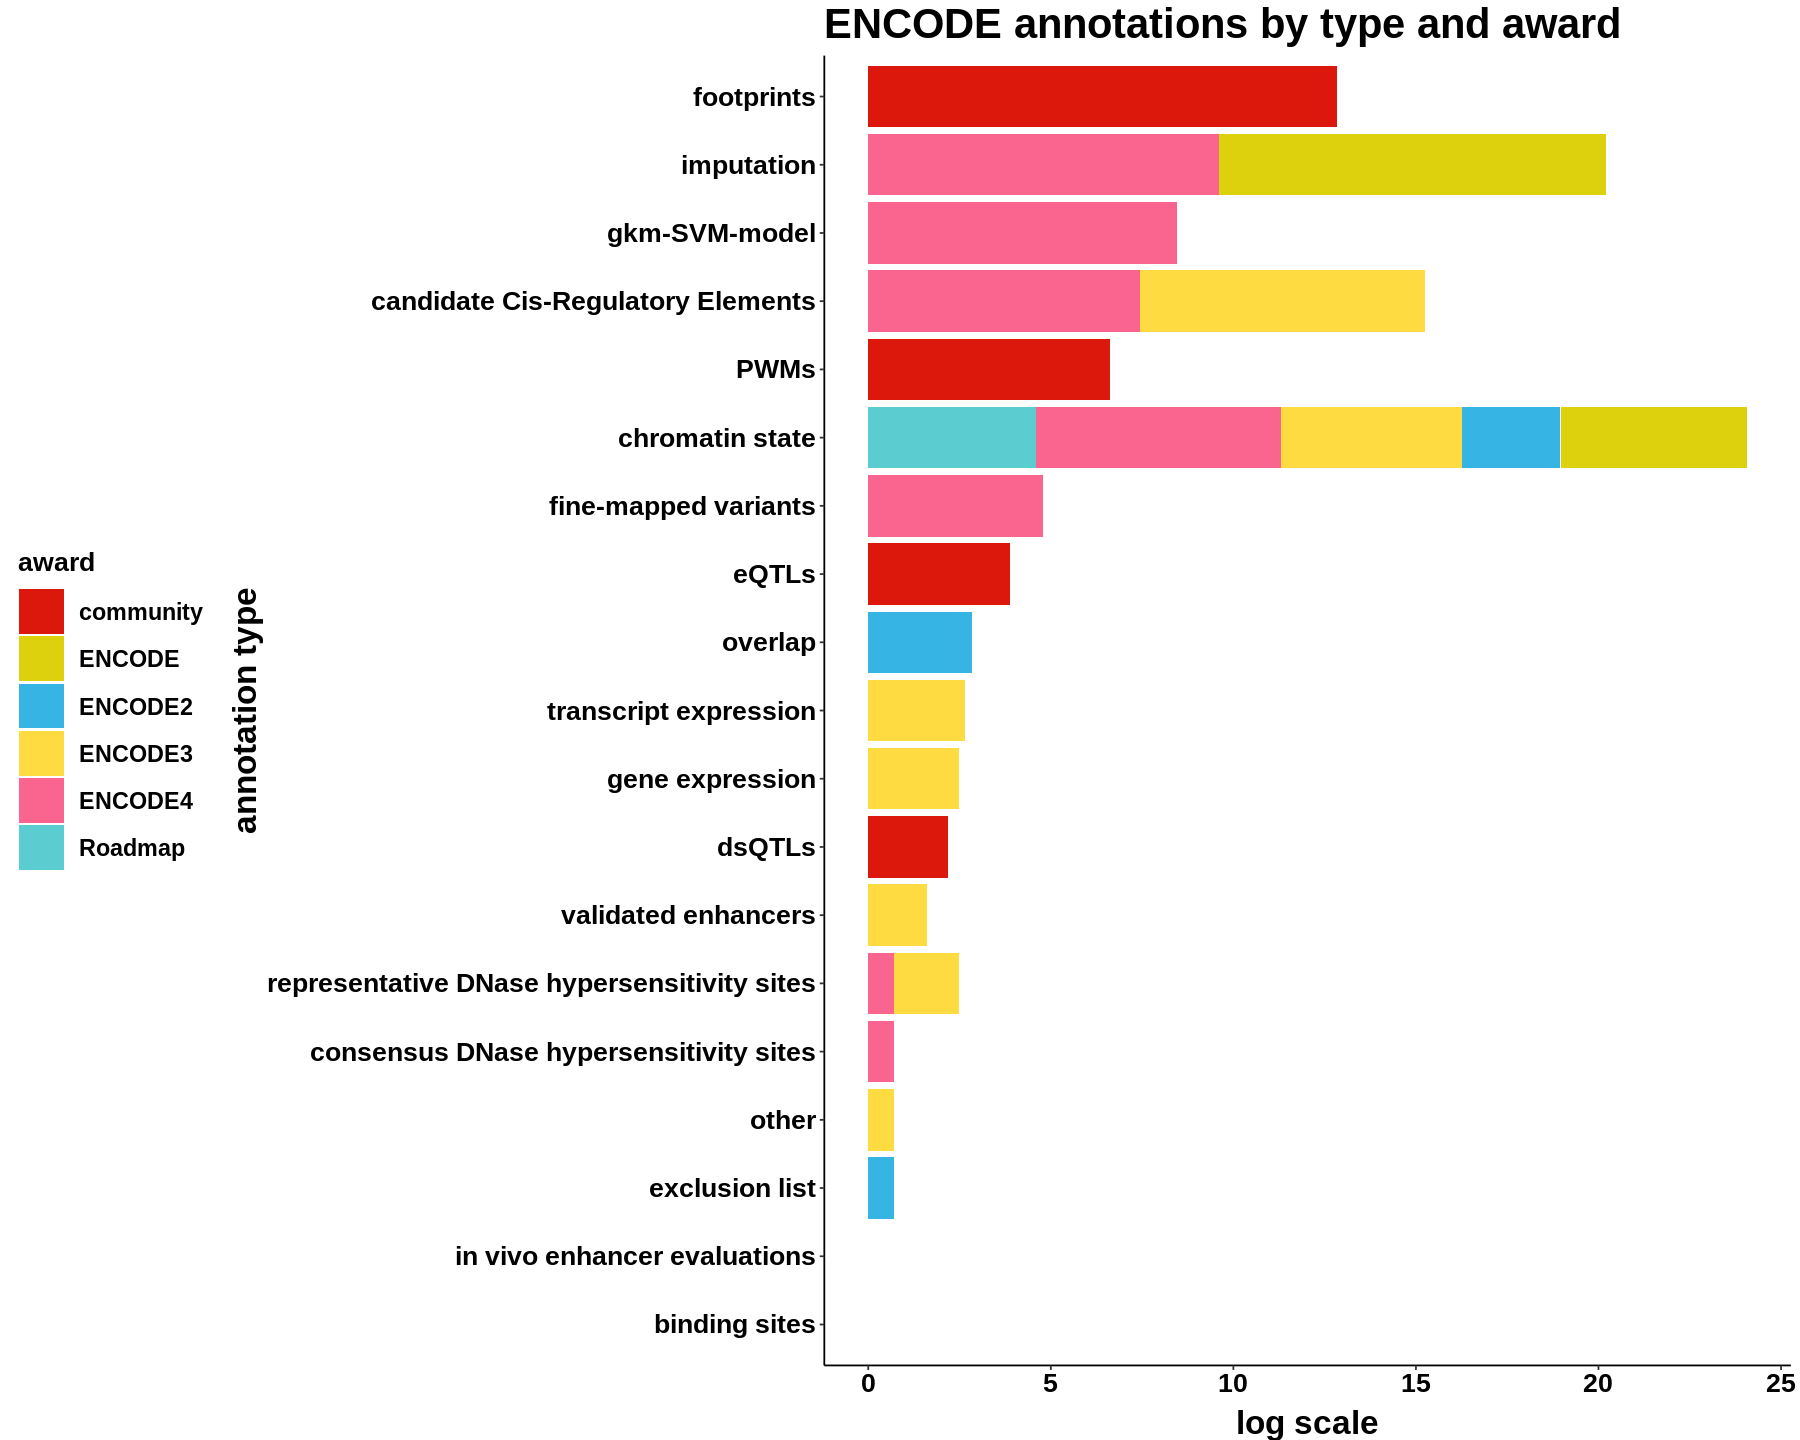

In [109]:
ggplot(my_df3) +
    geom_col(aes(x=reorder(annotation_type,Count), y=log(Count), fill=award)) + 
    #width=0.8, position = position_dodge(5)) +
    coord_flip() + theme_classic() +
    scale_fill_manual(values=c('#DB180B','#DCD10C', '#36B4E3','#FFDB42','#F9658F','#5BCDD1')) + #079BCC #FF0F96
    #geom_text(aes(x=annotation_type, y=log(Count),label = Count), 
     #vjust=1, hjust=1, angle=360, color="black", fontface='bold') +
    ggtitle("ENCODE annotations by type and award") +
    theme(legend.position="left", 
            legend.key.size=unit(1,"cm"),
           legend.text=element_text(size=14, color="black", face="bold"), 
           legend.title=element_text(size=16, color="black", face="bold"),
            #plot.margin=unit(c(0.5,0.5,0.5,0.5),"cm"),
           axis.title.x=element_text(vjust = -0.5, size=20, color="black", face="bold"),
           axis.title.y=element_text(hjust = 0.5, size=20, color="black", face="bold"),
           axis.text.x =element_text(size=16, color="black", face = "bold"),
           axis.text.y =element_text(size=16, color="black", face = "bold")) + 
           theme(plot.title = element_text(size = 25, face = "bold"),
           panel.spacing = unit(0.2, 'cm')) +
           xlab("annotation type") +
           ylab("log scale")

In [70]:
drsimonj_colors[8]

lightblue 
"#079BCC"